> 같은 underline function 다른 noise 시도

# import

In [1]:
import itstgcn_intro

import torch
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt

import random

from plotnine import *
import pickle

import plotly.express as px
import plotly.graph_objects as go

In [129]:
import itstgcn_batch

In [2]:
def load_data(fname):
    with open(fname, 'rb') as outfile:
        data_dict = pickle.load(outfile)
    return data_dict

def save_data(data_dict,fname):
    with open(fname,'wb') as outfile:
        pickle.dump(data_dict,outfile)

# Data

In [198]:
T = 2000
t = np.arange(T)/T * 5

In [199]:
np.random.seed(111)
node0 = 2*np.sin(4*t)+np.sin(4*t)
eps_node0  = np.random.normal(size=T)*5

In [200]:
np.random.seed(22)
node1 = node0.copy()
# for i in range(2,T):
#     y[i] = 0.7*x[i-1] - 0.25*x[i-2] + 0.5*np.cos(0.1*t[i]) 
eps_node1  = np.random.normal(size=T)*5

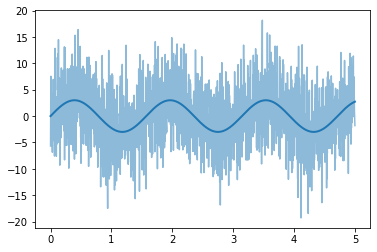

In [201]:
plt.plot(t,node0,color='C0',lw=2)
plt.plot(t,node0+eps_node0,alpha=0.5,color='C0')

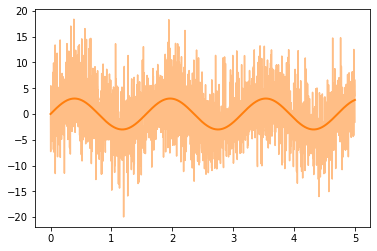

In [202]:
plt.plot(t,node1,color='C1',lw=2)
plt.plot(t,node1+eps_node1,alpha=0.5,color='C1')

In [203]:
_node_ids = {'node0':0, 'node1':1}

_FX1 = np.stack([node0+eps_node0,node1+eps_node1],axis=1).tolist()

_edges1 = torch.tensor([[0,1]]).tolist()

data_dict1 = {'edges':_edges1, 'node_ids':_node_ids, 'FX':_FX1}
data1 = pd.DataFrame({'node0':node0,'node1':node1,'node0_noise':eps_node0,'node1_noise':eps_node1,'node0_observed':node0+eps_node0,'node1_observed':node1+eps_node1})

save_data(data_dict1, './data/new_toy_dict.pkl')
save_data(data1, './data/new_toy_data.csv')

# Learn

In [204]:
class Intro:
    def __init__(self, data, data_dict, lags, mindex, mtype):
        self.loader = itstgcn_intro.DatasetLoader(data_dict)
        self.nodes = len(data_dict['edges'][0])
        self.T = len(data_dict['FX'])
        self.lags=lags
        self.mindex=mindex
        self.mtype=mtype
        self.observed_values = []

        for node in range(self.nodes):
            self.observed_values.append({
                f'node{node}': data[f'node{node}'],
                f'node{node}_noise': data[f'node{node}_noise'],
                f'node{node}_observed': data[f'node{node}_observed']
            })
        
        self.dataset = self.loader.get_dataset(lags=self.lags)
        self.dataset_miss = itstgcn_intro.miss(self.dataset,self.mindex,mtype=self.mtype)
        self.dataset_padded = itstgcn_intro.padding(self.dataset_miss,interpolation_method='linear')

    def lrnr(self, filters_1, epoch_1):
        self.epoch = epoch_1
        self.lrnr = itstgcn_intro.StgcnLearner(self.dataset_padded)
        self.lrnr.learn(filters_1, self.epoch)
        
        self.lrnr_it = itstgcn_intro.ITStgcnLearner(self.dataset_padded)
        self.lrnr_it.learn(filters_1, self.epoch)
        
#     def fig(self):
        
#         try:self.lrnr.model.eval()
#         except:pass
    
#         try:self.lrnr_it.model.eval()
#         except:pass
        
#         self.X_tr = self.lrnr(self.train_dataset) ['X']
#         self.y_tr = rslt_tr['y']
#         self.yhat_tr = rslt_tr['yhat']
        
#         self.f_tr = torch.concat([self.dataset[0].x.T,self.y_tr],axis=0).float()
#         self.fhat_tr = torch.concat([self.dataset[0].x.T,self.yhat_tr],axis=0).float()

In [205]:
data_dict1 = itstgcn_intro.load_data('./data/new_toy_dict.pkl')
data1 = itstgcn_intro.load_data('./data/new_toy_data.csv')
T = len(data_dict1['FX'])
mindex = [random.sample(range(0, T), int(T*0.8)),[np.array(list(range(750,1250)))]]

In [137]:
class Intro:
    def __init__(self, data, data_dict, lags, mindex, mtype):
        self.loader = itstgcn_batch.DatasetLoader(data_dict)
        self.nodes = len(data_dict['edges'][0])
        self.T = len(data_dict['FX'])
        self.lags=lags
        self.mindex=mindex
        self.mtype=mtype
        self.observed_values = []

        for node in range(self.nodes):
            self.observed_values.append({
                f'node{node}': data[f'node{node}'],
                f'node{node}_noise': data[f'node{node}_noise'],
                f'node{node}_observed': data[f'node{node}_observed']
            })
        
        self.dataset = self.loader.get_dataset(lags=self.lags)
        self.dataset_miss = itstgcn_batch.miss(self.dataset,self.mindex,mtype=self.mtype)
        self.dataset_padded = itstgcn_batch.padding(self.dataset_miss,interpolation_method='linear')

    def lrnr(self, filters_1, epoch_1):
        self.epoch = epoch_1
        self.lrnr = itstgcn_batch.StgcnLearner(self.dataset_padded)
        self.lrnr.learn(filters_1, self.epoch,batch_size=16)
        
        self.lrnr_it = itstgcn_batch.ITStgcnLearner(self.dataset_padded)
        self.lrnr_it.learn(filters_1, self.epoch,batch_size=16)
        
#     def fig(self):
        
#         try:self.lrnr.model.eval()
#         except:pass
    
#         try:self.lrnr_it.model.eval()
#         except:pass
        
#         self.X_tr = self.lrnr(self.train_dataset) ['X']
#         self.y_tr = rslt_tr['y']
#         self.yhat_tr = rslt_tr['yhat']
        
#         self.f_tr = torch.concat([self.dataset[0].x.T,self.y_tr],axis=0).float()
#         self.fhat_tr = torch.concat([self.dataset[0].x.T,self.yhat_tr],axis=0).float()

In [221]:
!python --version

Python 3.8.0


In [138]:
data_dict1 = itstgcn_batch.load_data('./data/new_toy_dict.pkl')
data1 = itstgcn_batch.load_data('./data/new_toy_data.csv')
T = len(data_dict1['FX'])
mindex = [random.sample(range(0, T), int(T*0.8)),[np.array(list(range(750,300)))]]

In [206]:
test = Intro(data=data1, data_dict=data_dict1, lags=4, mindex=mindex, mtype='block')

In [207]:
test.lrnr(filters_1=4,epoch_1=5)

In [208]:
def record_yhat(classs, lrnr_name):
    results = getattr(classs, lrnr_name).result_dict
    dfs_by_node = {}

    for node in range(0, classs.nodes):
        df_node = pd.DataFrame()
        df_node[f'node{node}_underline'] = classs.observed_values[node][f'node{node}'][:-classs.lags]
        df_node[f'node{node}_noise'] = classs.observed_values[node][f'node{node}_noise'][:-classs.lags]
        df_node[f'node{node}_observed'] = classs.observed_values[node][f'node{node}_observed'][:-classs.lags]
        df_node[f'node{node}_missing'] = torch.tensor(classs.dataset_miss.targets).reshape(-1,2)[:,node]
        df_node[f'node{node}_padding'] = torch.tensor(classs.dataset_padded.targets).reshape(-1,2)[:,node]
        # df_node[f'node{node}_trim'] = class.tnp.array(test.dataset_padded.targets)[:,node]
        # df_node[f'yhat node{node}'] = classs.yhat_tr[:, node]

        for epoch in range(0, classs.epoch):
            epoch_key = f'epoch={epoch},node={node}'
            df_node[epoch_key] = [
                str(results[f'epoch={epoch},time={time_step}'].detach()[node]).replace("tensor(", "").strip().replace(")", "").strip()
                for time_step in range(0, classs.T-classs.lags)
            ]
        
        df_node = df_node.reset_index() 
        df_node.rename(columns={'index': 'Time'}, inplace=True)
        dfs_by_node[node] = df_node

    return dfs_by_node

# 예시 사용
df_yhat = record_yhat(test,lrnr_name='lrnr')
df_yhat_it = record_yhat(test,lrnr_name='lrnr_it')

In [209]:
melted_df = df_yhat[0].melt(id_vars=['Time'], value_name='value', ignore_index=False)
split_cols = melted_df['variable'].str.split(',', expand=True)
melted_df = pd.concat([melted_df, split_cols], axis=1)
melted_df = melted_df.rename(columns={0: 'first_part', 1: 'second_part'})
melted_df['value'] = pd.to_numeric(melted_df['value'], errors='coerce')
melted_df.head()

Time         variable     value       first_part second_part
0     0  node0_underline  0.000000  node0_underline        None
1     1  node0_underline  0.030000  node0_underline        None
2     2  node0_underline  0.059996  node0_underline        None
3     3  node0_underline  0.089987  node0_underline        None
4     4  node0_underline  0.119968  node0_underline        None

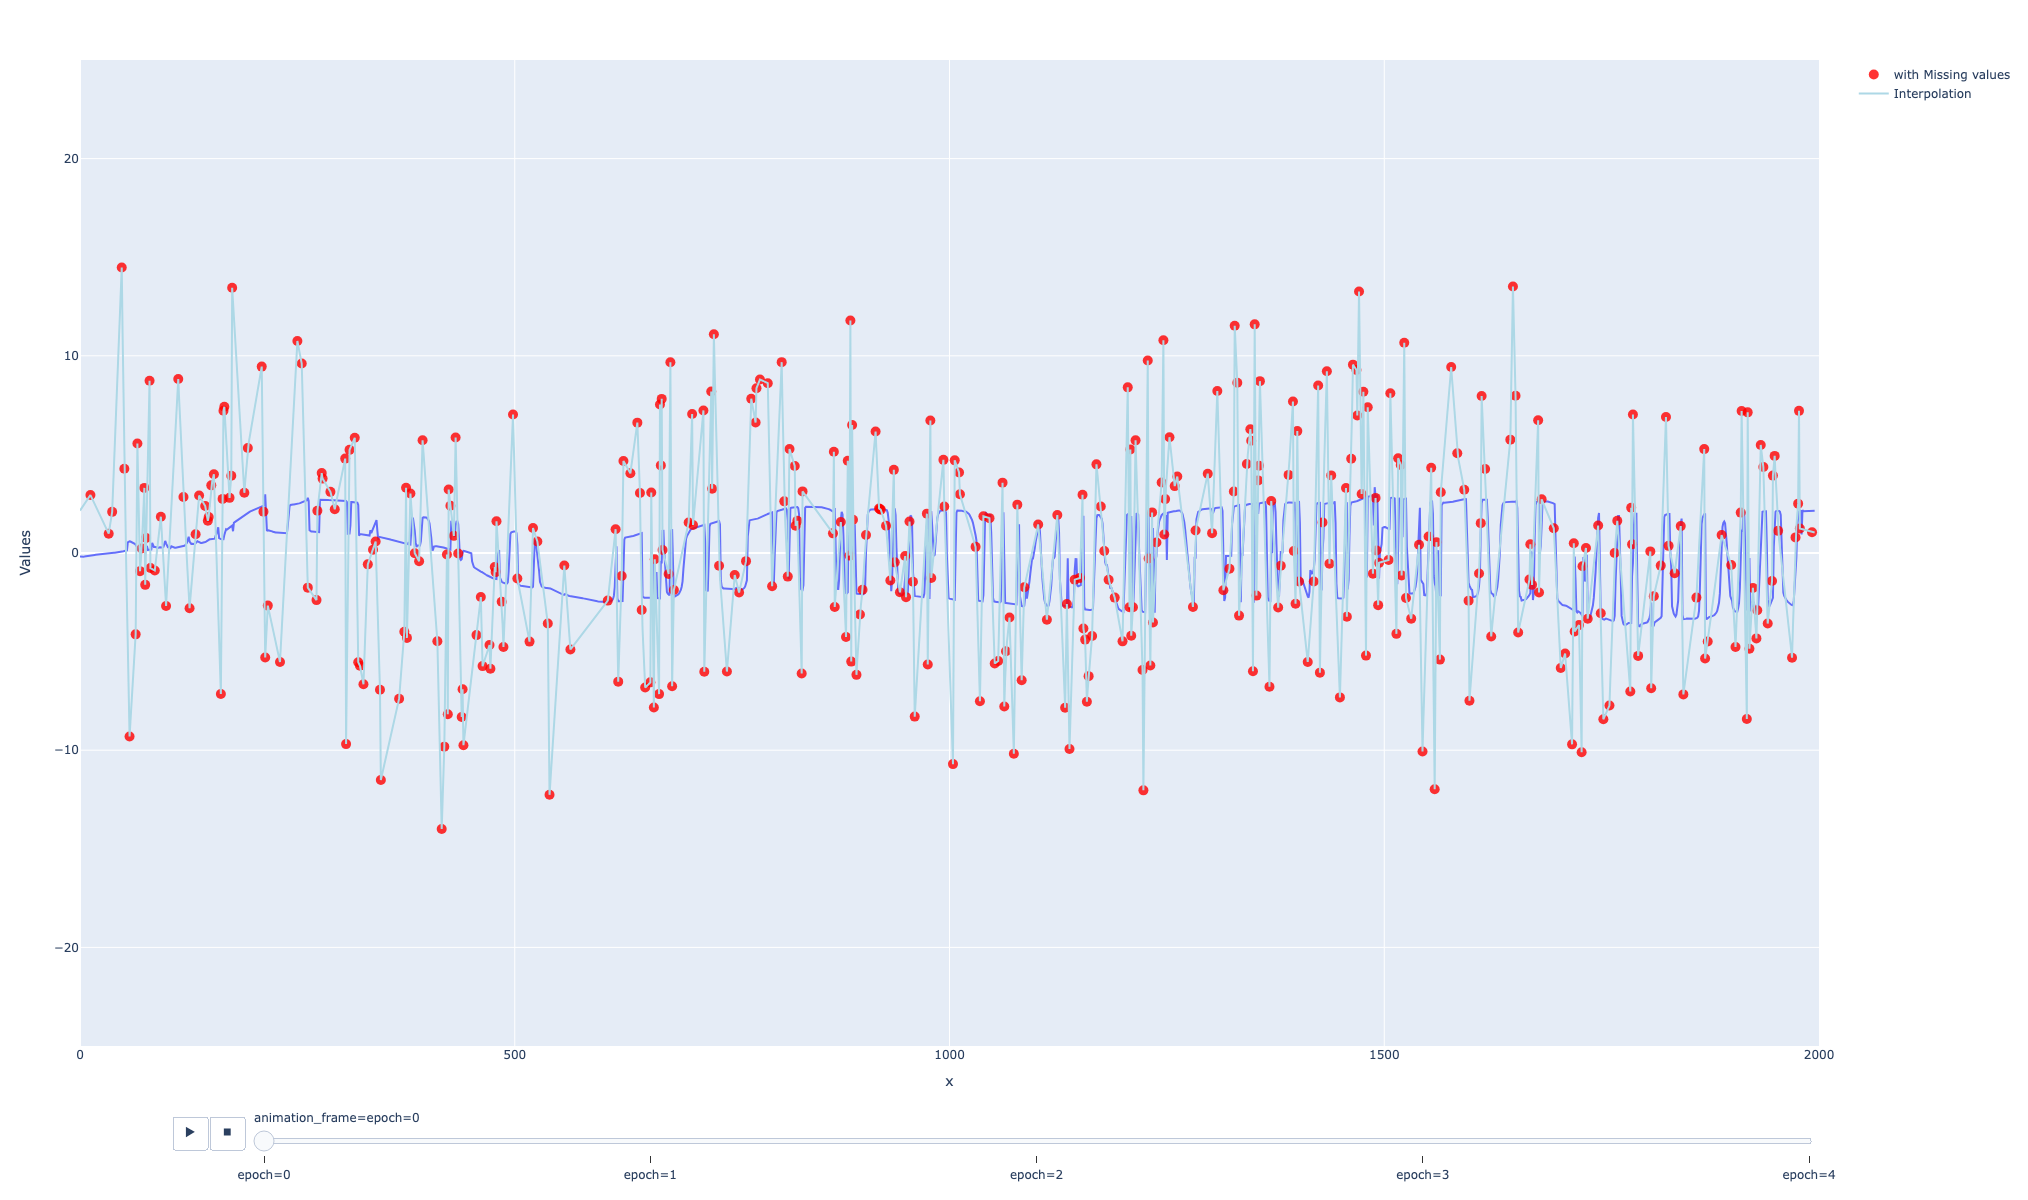

In [210]:
fig = px.line(melted_df, 
                 x = melted_df.query('first_part not in ["node0_observed","node0_underline","node0_noise","node0_missing","node0_padding"]')['Time'], 
                 y = melted_df.query('first_part not in ["node0_observed","node0_underline","node0_noise","node0_missing","node0_padding"]')['value'], 
                 animation_frame = melted_df.query('first_part not in ["node0_observed","node0_underline","node0_noise","node0_missing","node0_padding"]')['first_part'],
                 range_x=[0,test.T], range_y=[-25,25],
                 width=2000, height=1200)
# fig.add_scatter(x=melted_df.query('first_part=="node0_underline"')['Time'], y=melted_df.query('first_part=="node0_underline"')['value'],
#                 marker=dict(color="grey",size=1,opacity=0.8), name ="Underline Function") 
# fig.add_scatter(x=melted_df.query('first_part=="node0_noise"')['Time'], y=melted_df.query('first_part=="node0_noise"')['value'],
#                 marker=dict(color="LightSlateGray",size=1,opacity=0.8),name ="Noise") 
# fig.add_scatter(x=melted_df.query('first_part=="node0_observed"')['Time'], y=melted_df.query('first_part=="node0_observed"')['value'],
#                 marker=dict(color="LightSlateGray",size=1,opacity=0.8),name ="Observed Values") 
# fig.add_scatter(x=melted_df.query('first_part=="node0_trim"')['Time'], y=melted_df.query('first_part=="node0_trim"')['value'],
#                 marker=dict(color="LightSlateGray",size=1,opacity=0.8),name ="Observed Values") 
fig.add_scatter(x=melted_df.query('first_part=="node0_missing"')['Time'], y=melted_df.query('first_part=="node0_missing"')['value'],
                marker=dict(color="red",size=10,opacity=0.8), name ="with Missing values",mode='markers')
fig.add_scatter(x=melted_df.query('first_part=="node0_padding"')['Time'], y=melted_df.query('first_part=="node0_padding"')['value'],
                marker=dict(color="lightblue",size=1,opacity=0.8), name ="Interpolation",mode='lines')
# for i in range(test.lags+1):
#     fig.layout['sliders'][0]['steps'][i].args[1]['frame']['redraw'] = False
# fig.data[0]['marker']['color'] = 'blue'
# fig.layout.updatemenus[0]['buttons'][0]['args'][1]['frame']['duration']=1000
# fig.layout['sliders'][0]['currentvalue'] = {'prefix': ''}
# fig.layout['xaxis'].title='Time'
fig.layout['yaxis'].title='Values'
fig

In [211]:
melted_df = df_yhat_it[0].melt(id_vars=['Time'], value_name='value', ignore_index=False)
split_cols = melted_df['variable'].str.split(',', expand=True)
melted_df = pd.concat([melted_df, split_cols], axis=1)
melted_df = melted_df.rename(columns={0: 'first_part', 1: 'second_part'})
melted_df['value'] = pd.to_numeric(melted_df['value'], errors='coerce')
melted_df.head()

Time         variable     value       first_part second_part
0     0  node0_underline  0.000000  node0_underline        None
1     1  node0_underline  0.030000  node0_underline        None
2     2  node0_underline  0.059996  node0_underline        None
3     3  node0_underline  0.089987  node0_underline        None
4     4  node0_underline  0.119968  node0_underline        None

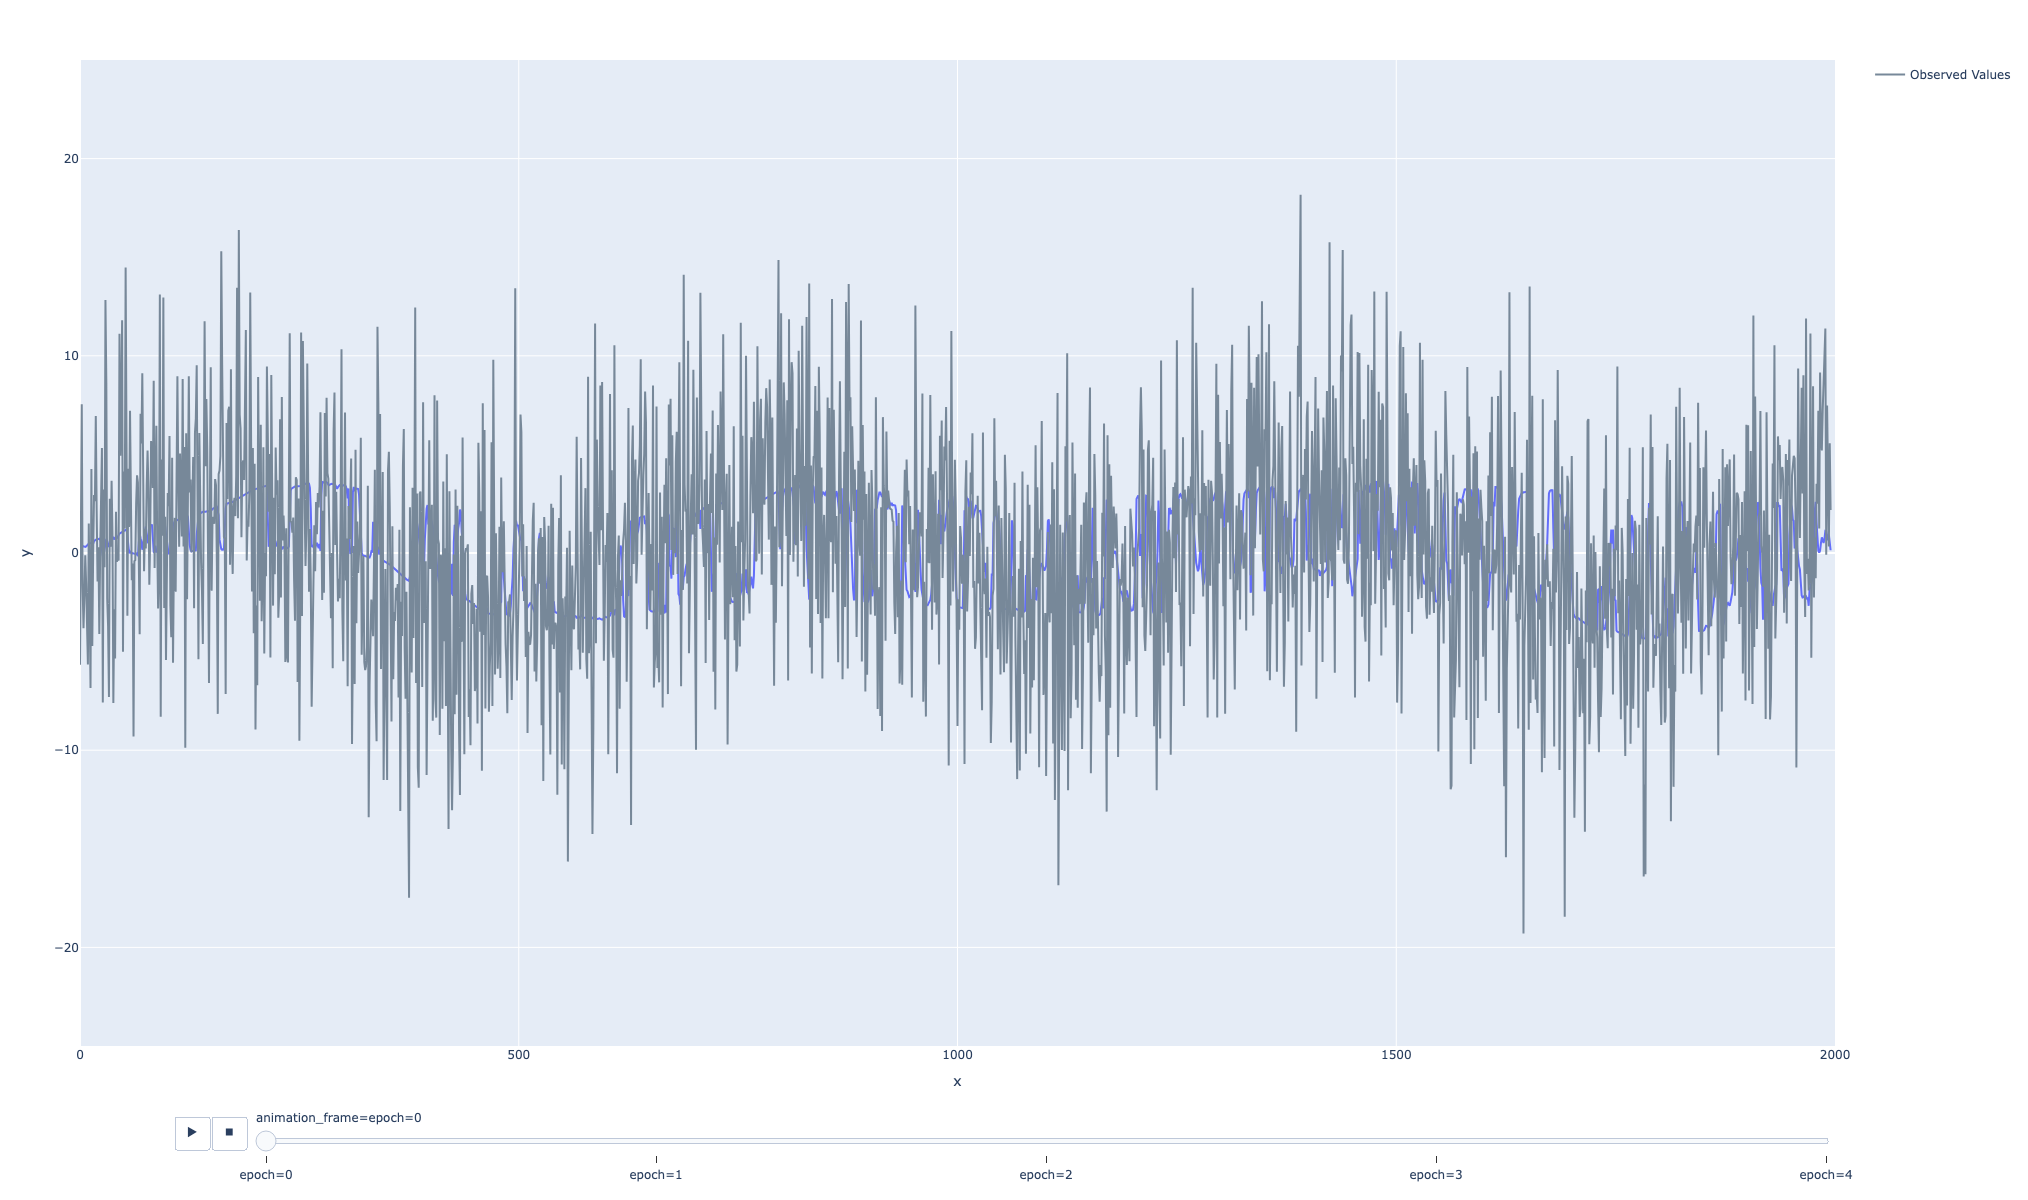

In [212]:
fig = px.line(melted_df, 
                 x = melted_df.query('first_part not in ["node0_observed","node0_underline","node0_noise","node0_missing","node0_padding"]')['Time'], 
                 y = melted_df.query('first_part not in ["node0_observed","node0_underline","node0_noise","node0_missing","node0_padding"]')['value'], 
                 animation_frame = melted_df.query('first_part not in ["node0_observed","node0_underline","node0_noise","node0_missing","node0_padding"]')['first_part'],
                 range_x=[0,test.T], range_y=[-25,25],
                 width=2000, height=1200)
# fig.add_scatter(x=melted_df.query('first_part=="node0_underline"')['Time'], y=melted_df.query('first_part=="node0_underline"')['value'],
#                 marker=dict(color="grey",size=1,opacity=0.8), name ="Underline Function") 
# fig.add_scatter(x=melted_df.query('first_part=="node0_noise"')['Time'], y=melted_df.query('first_part=="node0_noise"')['value'],
#                 marker=dict(color="LightSlateGray",size=1,opacity=0.8),name ="Noise") 
fig.add_scatter(x=melted_df.query('first_part=="node0_observed"')['Time'], y=melted_df.query('first_part=="node0_observed"')['value'],
                marker=dict(color="LightSlateGray",size=1,opacity=0.8),name ="Observed Values")
# fig.add_scatter(x=melted_df.query('first_part=="node0_missing"')['Time'], y=melted_df.query('first_part=="node0_missing"')['value'],
#                 marker=dict(color="blue",size=1,opacity=0.8), name ="with Missing values",mode='lines')
# fig.add_scatter(x=melted_df.query('first_part=="node0_padding"')['Time'], y=melted_df.query('first_part=="node0_padding"')['value'],
# #                 marker=dict(color="lightblue",size=1,opacity=0.8), name ="Interpolation",mode='lines')
# for i in range(test.lags+1):
#     fig.layout['sliders'][0]['steps'][i].args[1]['frame']['redraw'] = False
# fig.data[0]['marker']['color'] = 'blue'
# fig.layout.updatemenus[0]['buttons'][0]['args'][1]['frame']['duration']=1000
# fig.layout['sliders'][0]['currentvalue'] = {'prefix': ''}
# fig.layout['xaxis'].title='Time'
# fig.layout['yaxis'].title='Values'
fig

node 2

In [213]:
melted_df = df_yhat[1].melt(id_vars=['Time'], value_name='value', ignore_index=False)
split_cols = melted_df['variable'].str.split(',', expand=True)
melted_df = pd.concat([melted_df, split_cols], axis=1)
melted_df = melted_df.rename(columns={0: 'first_part', 1: 'second_part'})
melted_df['value'] = pd.to_numeric(melted_df['value'], errors='coerce')
melted_df.head()

Time         variable     value       first_part second_part
0     0  node1_underline  0.000000  node1_underline        None
1     1  node1_underline  0.030000  node1_underline        None
2     2  node1_underline  0.059996  node1_underline        None
3     3  node1_underline  0.089987  node1_underline        None
4     4  node1_underline  0.119968  node1_underline        None

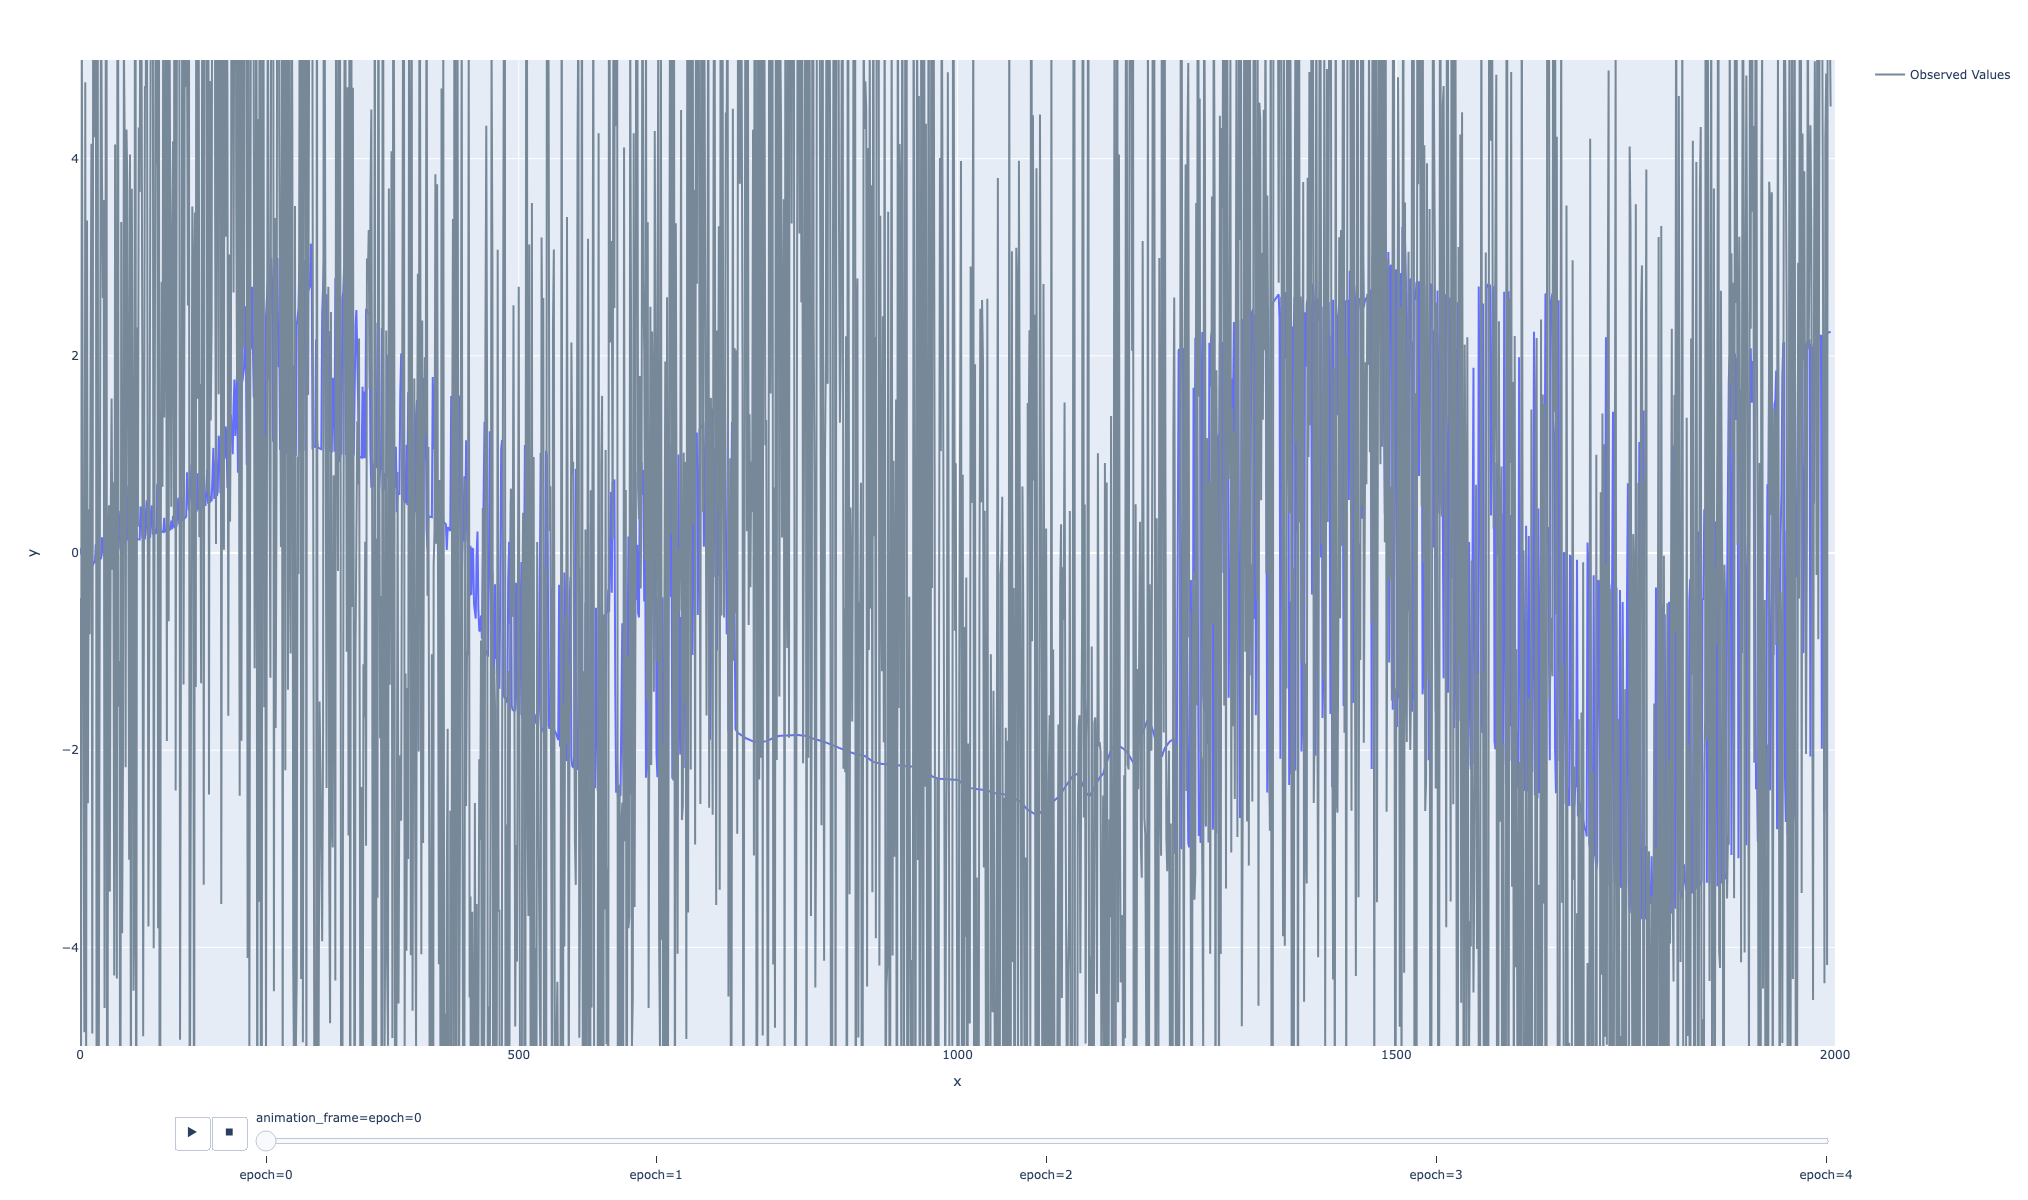

In [214]:
fig = px.line(melted_df, 
                 x = melted_df.query('first_part not in ["node1_observed","node1_underline","node1_noise","node1_missing","node1_padding"]')['Time'], 
                 y = melted_df.query('first_part not in ["node1_observed","node1_underline","node1_noise","node1_missing","node1_padding"]')['value'], 
                 animation_frame = melted_df.query('first_part not in ["node1_observed","node1_underline","node1_noise","node1_missing","node1_padding"]')['first_part'],
                 range_x=[0,test.T], range_y=[-5,5],
                 width=2000, height=1200)
# fig.add_scatter(x=melted_df.query('first_part=="node1_underline"')['Time'], y=melted_df.query('first_part=="node1_underline"')['value'],
#                 marker=dict(color="grey",size=1,opacity=0.8), name ="Underline Function") 
# fig.add_scatter(x=melted_df.query('first_part=="node1_noise"')['Time'], y=melted_df.query('first_part=="node1_noise"')['value'],
#                 marker=dict(color="LightSlateGray",size=1,opacity=0.8),name ="Noise") 
fig.add_scatter(x=melted_df.query('first_part=="node1_observed"')['Time'], y=melted_df.query('first_part=="node1_observed"')['value'],
                marker=dict(color="LightSlateGray",size=1,opacity=0.8),name ="Observed Values") 
# fig.add_scatter(x=melted_df.query('first_part=="node1_missing"')['Time'], y=melted_df.query('first_part=="node1_missing"')['value'],
#                 marker=dict(color="blue",size=1,opacity=0.8), name ="with Missing values",mode='lines')
# fig.add_scatter(x=melted_df.query('first_part=="node1_padding"')['Time'], y=melted_df.query('first_part=="node1_padding"')['value'],
#                 marker=dict(color="lightblue",size=1,opacity=0.8), name ="Interpolation",mode='lines')
# for i in range(test.lags+1):
#     fig.layout['sliders'][0]['steps'][i].args[1]['frame']['redraw'] = False
# fig.data[0]['marker']['color'] = 'blue'
# fig.layout.updatemenus[0]['buttons'][0]['args'][1]['frame']['duration']=1000
# fig.layout['sliders'][0]['currentvalue'] = {'prefix': ''}
# fig.layout['xaxis'].title='Time'
# fig.layout['yaxis'].title='Values'
fig

In [215]:
melted_df = df_yhat_it[1].melt(id_vars=['Time'], value_name='value', ignore_index=False)
split_cols = melted_df['variable'].str.split(',', expand=True)
melted_df = pd.concat([melted_df, split_cols], axis=1)
melted_df = melted_df.rename(columns={0: 'first_part', 1: 'second_part'})
melted_df['value'] = pd.to_numeric(melted_df['value'], errors='coerce')
melted_df.head()

Time         variable     value       first_part second_part
0     0  node1_underline  0.000000  node1_underline        None
1     1  node1_underline  0.030000  node1_underline        None
2     2  node1_underline  0.059996  node1_underline        None
3     3  node1_underline  0.089987  node1_underline        None
4     4  node1_underline  0.119968  node1_underline        None

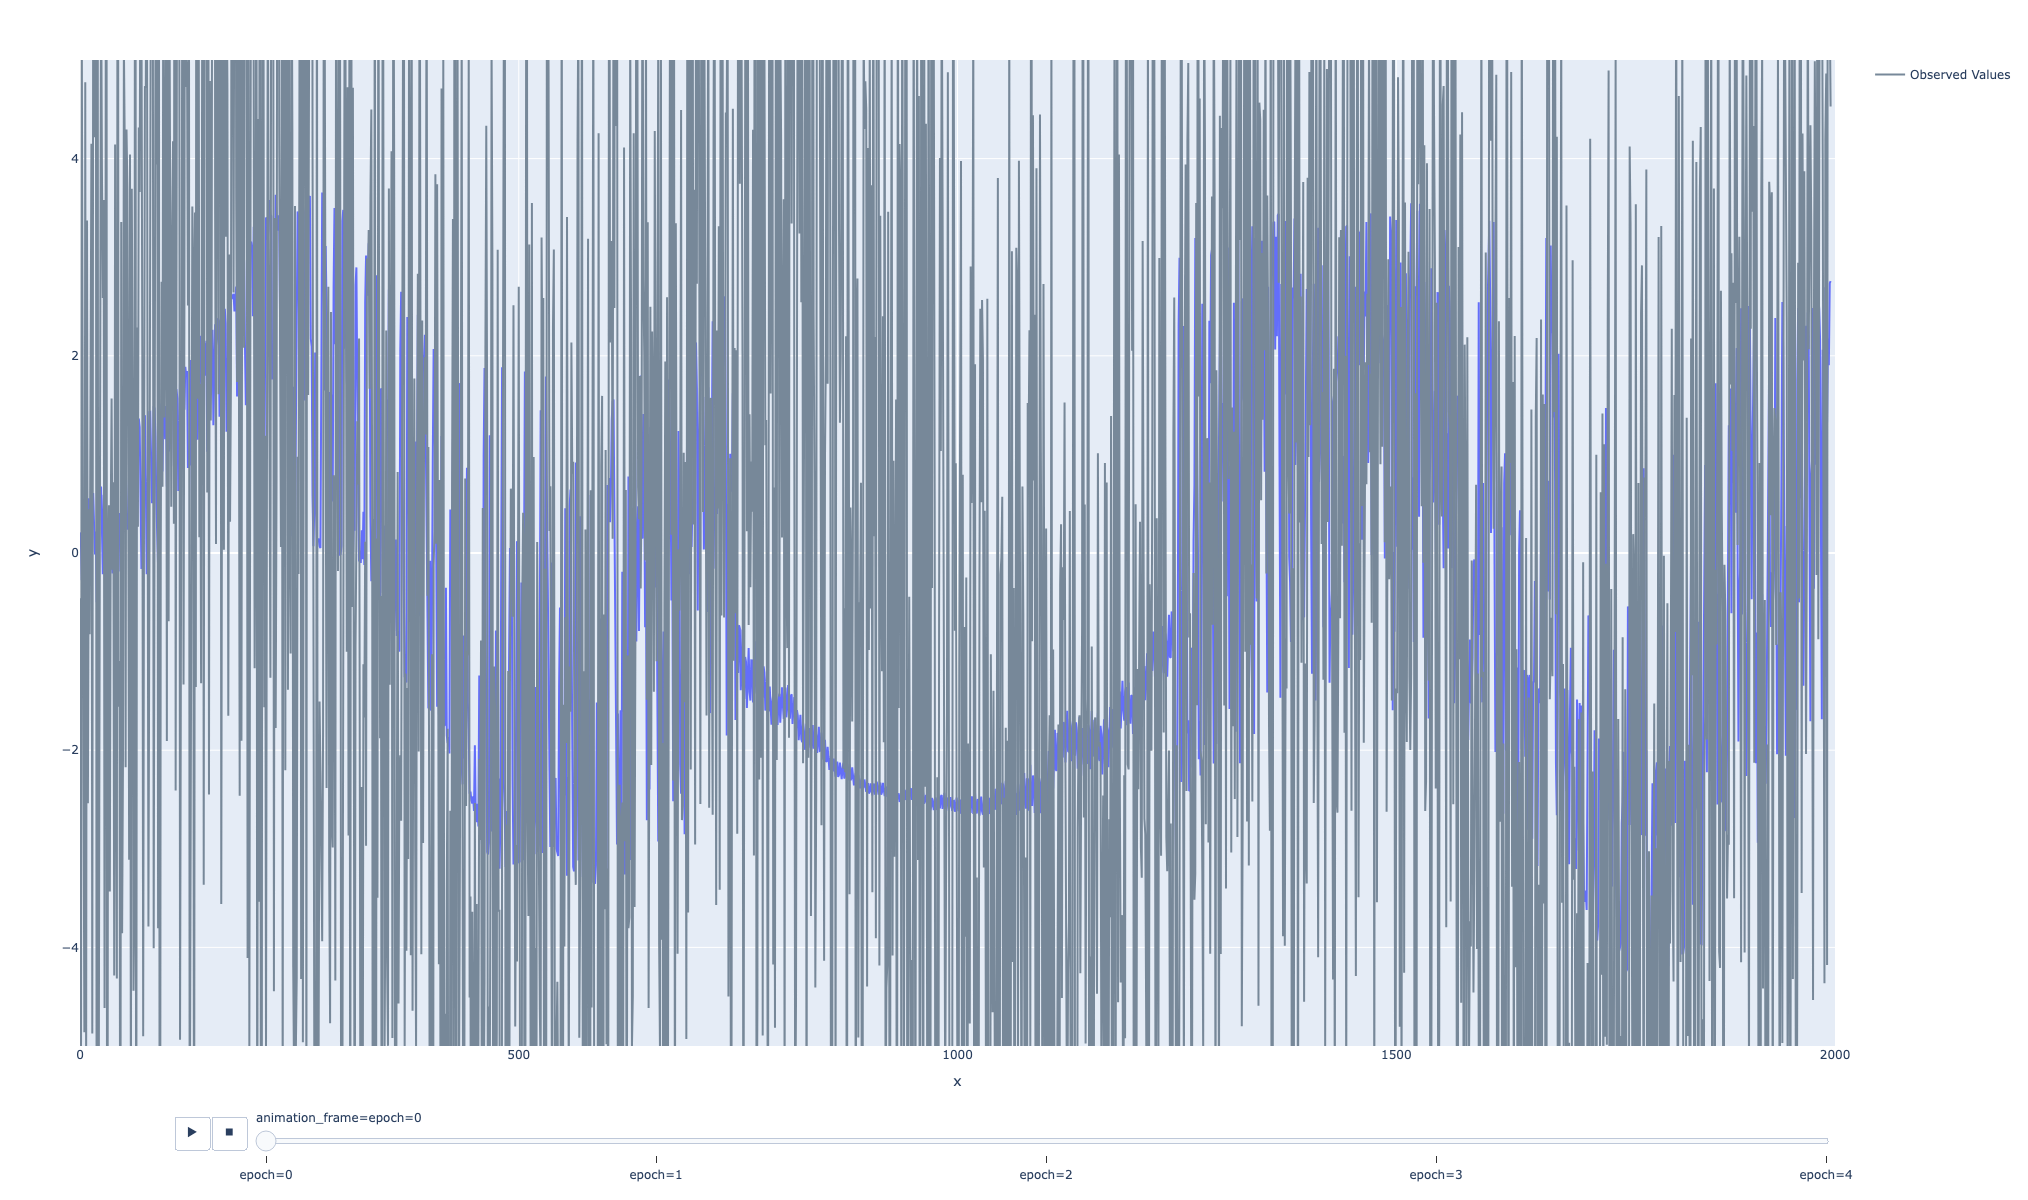

In [216]:
fig = px.line(melted_df, 
                 x = melted_df.query('first_part not in ["node1_observed","node1_underline","node1_noise","node1_missing","node1_padding"]')['Time'], 
                 y = melted_df.query('first_part not in ["node1_observed","node1_underline","node1_noise","node1_missing","node1_padding"]')['value'], 
                 animation_frame = melted_df.query('first_part not in ["node1_observed","node1_underline","node1_noise","node1_missing","node1_padding"]')['first_part'],
                 range_x=[0,test.T], range_y=[-5,5],
                 width=2000, height=1200)
# fig.add_scatter(x=melted_df.query('first_part=="node1_underline"')['Time'], y=melted_df.query('first_part=="node1_underline"')['value'],
#                 marker=dict(color="grey",size=1,opacity=0.8), name ="Underline Function") 
# fig.add_scatter(x=melted_df.query('first_part=="node1_noise"')['Time'], y=melted_df.query('first_part=="node1_noise"')['value'],
#                 marker=dict(color="LightSlateGray",size=1,opacity=0.8),name ="Noise") 
fig.add_scatter(x=melted_df.query('first_part=="node1_observed"')['Time'], y=melted_df.query('first_part=="node1_observed"')['value'],
                marker=dict(color="LightSlateGray",size=1,opacity=0.8),name ="Observed Values") 
# fig.add_scatter(x=melted_df.query('first_part=="node1_missing"')['Time'], y=melted_df.query('first_part=="node1_missing"')['value'],
#                 marker=dict(color="blue",size=1,opacity=0.8), name ="with Missing values",mode='lines')
# fig.add_scatter(x=melted_df.query('first_part=="node1_padding"')['Time'], y=melted_df.query('first_part=="node1_padding"')['value'],
#                 marker=dict(color="lightblue",size=1,opacity=0.8), name ="Interpolation",mode='lines')
# for i in range(test.lags+1):
#     fig.layout['sliders'][0]['steps'][i].args[1]['frame']['redraw'] = False
# fig.data[0]['marker']['color'] = 'blue'
# fig.layout.updatemenus[0]['buttons'][0]['args'][1]['frame']['duration']=1000
# fig.layout['sliders'][0]['currentvalue'] = {'prefix': ''}
# fig.layout['xaxis'].title='Time'
# fig.layout['yaxis'].title='Values'
fig

In [217]:
fig.layout.template

layout.Template({
    'data': {'bar': [{'error_x': {'color': '#2a3f5f'},
                      'error_y': {'color': '#2a3f5f'},
                      'marker': {'line': {'color': '#E5ECF6', 'width': 0.5},
                                 'pattern': {'fillmode': 'overlay', 'size': 10, 'solidity': 0.2}},
                      'type': 'bar'}],
             'barpolar': [{'marker': {'line': {'color': '#E5ECF6', 'width': 0.5},
                                      'pattern': {'fillmode': 'overlay', 'size': 10, 'solidity': 0.2}},
                           'type': 'barpolar'}],
             'carpet': [{'aaxis': {'endlinecolor': '#2a3f5f',
                                   'gridcolor': 'white',
                                   'linecolor': 'white',
                                   'minorgridcolor': 'white',
                                   'startlinecolor': '#2a3f5f'},
                         'baxis': {'endlinecolor': '#2a3f5f',
                                   'gridcolor': 'white',


In [218]:
# fig = go.Figure(
#     data=[go.Scatter(x=melted_df.Time, y=melted_df.query('variable=="node0_underline"').value,
#                      name="underline",
#                      mode="lines",
#                      line=dict(width=2, color="blue")),
#          go.Scatter(x=melted_df.Time, y=melted_df.query('variable=="node0_noise"').value,
#                      name="observed data",
#                      mode="lines",
#                      line=dict(width=2, color="black"))],
    
#         layout=go.Layout(width=2000, height=1200,
#                      xaxis=dict(range=[0, 500], autorange=False, zeroline=False),
#                      yaxis=dict(range=[-10, 10], autorange=False, zeroline=False),
#                      title="",
#                      hovermode="closest",
#                     updatemenus=[dict(type="buttons",
#                           buttons=[dict(label="Play",
#                                         method="animate",
#                                         args=[None])])]),
#     # frames=[go.Frame(data=[go.Scatter(x=[range(0, test.T-test.lags)], y=[melted_df.query('first_part=="epoch=0"')['value'].tolist()],mode="lines",line=dict(color="red", width=2) )])
#     #        # go.Frame(data=[go.Scatter(x=[range(0, test.T-test.lags)], y=[melted_df.query('first_part=="epoch=1"')['value'].tolist()],mode="lines",line=dict(color="red", width=2,layout=go.Layout(title_text="End Title"))])
#     #        ]
                 
# )
# fig